Modules nécessaires : 

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

from HiggsML.ingestion import Ingestion
from HiggsML.datasets import download_dataset
from sample_code_submission.neural_network import NeuralNetwork
from sys import path
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from itertools import product
from numpy.random import RandomState
import warnings
import os
import sys

warnings.filterwarnings("ignore")

Charger les données : 

In [2]:
data = download_dataset(
    "blackSwan_data"
)  # change to "blackSwan_data" for the actual data

# load train set
data.load_train_set()
data_set = data.get_train_set()

2025-06-05 09:12:48,620 - HiggsML.datasets     - INFO     - Handling as dataset name: blackSwan_data
2025-06-05 09:12:48,625 - HiggsML.datasets     - INFO     - Current working directory: c:\Users\marwa\Desktop\Neural Network\Higgs_collaboration_A
2025-06-05 09:12:48,629 - HiggsML.datasets     - INFO     - Total rows: 2000000
2025-06-05 09:12:48,629 - HiggsML.datasets     - INFO     - Test size: 600000
2025-06-05 09:12:48,707 - HiggsML.datasets     - INFO     - Selected train size: 1400000
2025-06-05 09:12:49,851 - HiggsML.datasets     - INFO     - Data loaded successfully


In [3]:
target = data_set["labels"]
weights = data_set["weights"]
detailed_label = data_set["detailed_labels"]
keys = np.unique(detailed_label)

Direction

In [4]:
root_dir = os.getcwd()
print("Root directory is", root_dir)
submission_dir = os.path.join(root_dir, "sample_code_submission")

# The directory where results and other outputs from the participant's code will be written
output_dir = os.path.join(root_dir, "sample_result_submission")

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

Root directory is c:\Users\marwa\Desktop\Neural Network\Higgs_collaboration_A


Import Submission Model

In [5]:
path.append(submission_dir)
from model import Model

Testing Settings

In [6]:
TEST_SETTINGS = {
    "systematics": {  # Systematics to use
        "tes": False,  # tau energy scale
        "jes": False,  # jet energy scale
        "soft_met": False,  # soft term in MET
        "ttbar_scale": False,  # W boson scale factor
        "diboson_scale": False,  # Diboson scale factor
        "bkg_scale": False,  # Background scale factor
    },
    "num_pseudo_experiments": 25,  # Number of pseudo-experiments to run per set
    "num_of_sets": 25,  # Number of sets of pseudo-experiments to run
}

RANDOM_SEED = 42


In [7]:
test_settings = TEST_SETTINGS.copy()

random_state = np.random.RandomState(RANDOM_SEED)
test_settings["ground_truth_mus"] = (
    random_state.uniform(0.1, 3, test_settings["num_of_sets"])
).tolist()

random_settings_file = os.path.join(output_dir, "test_settings.json")
with open(random_settings_file, "w") as f:
    json.dump(test_settings, f)

Boucle sur "Ingestion" en faisant varier epochs

Graphique

In [8]:
def graphique(S, E):
    plt.plot(S, E, marker='o', linestyle='-', color='b')
    plt.title('Significance en fonction de epochs')
    plt.xlabel('significance')
    plt.ylabel('epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

Calcul AUC : 

Significance

In [11]:

def optimization(train_data): 
    L_epochs = np.linspace(5, 5, 1)
    sigmax = 0
    epochs_max = 1
    S = []
    E = []
    for k in range(len(L_epochs)):
        ingestion = Ingestion(data)
        # initialize submission
        ingestion.init_submission(Model, "NN")
        ingestion.model.model.epochs = int(L_epochs[k])
        print(ingestion.model.model.epochs)
        ingestion.fit_submission()
        sig1 = ingestion.model.significance_2()
        print(sig1)
        #visualisation des données :
        S.append(sig1)
        E.append(int(L_epochs[k]))
        if sig1>sigmax: 
            sigmax = sig1
            epochs_max = int(L_epochs[k])
    graphique(S, E)
    return sigmax, epochs_max



Il y a plusieurs problématique : 
Comment modifier une variable epochs de notre 

test_labels=ingestion.model.training_set["labels"],test_weights=ingestion.model.training_set["weights"]

Lancement de la boucle

A l'aide des autres programmes d'optimisations, on a obtenu batchsize : 120, 

2025-06-05 09:14:52,252 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 09:14:52,262 - HiggsML.datasets     - INFO     - Selected train size: 50000
2025-06-05 09:14:52,626 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:14:52,643 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  674.8969144596985
sum_bkg_weights:  105044.10308554032


2025-06-05 09:14:53,111 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:14:53,134 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  674.6495938429954
sum_bkg_weights:  105044.35040615704


2025-06-05 09:14:53,509 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:14:53,562 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  670.6363016453815
sum_bkg_weights:  105048.3636983546
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
5
Epoch 1/5
1000/1000 - 3s - 3ms/step - accuracy: 0.7850 - loss: 2.0329
Epoch 2/5
1000/1000 - 2s - 2ms/step - accuracy: 0.8077 - loss: 1.9019
Epoch 3/5
1000/1000 - 2s - 2ms/step - accuracy: 0.8121 - loss: 1.8737
Epoch 4/5
1000/1000 - 2s - 2ms/step - accuracy: 0.8145 - loss: 1.8559
Epoch 5/5
1000/1000 - 2s - 2ms/step - accuracy: 0.8170 - loss: 1.8409
1433/1433 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
score shape before threshold (45834,)
score shape after threshold (45834,)
1433/1433 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1433/1433 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
saved_info {'beta': np.float64(16208.334988794317), 'gamma': np.float64(496.90216427808355), 'tes_fit': <function tes_fitter.<locals>.fit_function at 0x000002D75F922340>, 'jes_fit': <function jes_fitter.<locals>.fit_fu

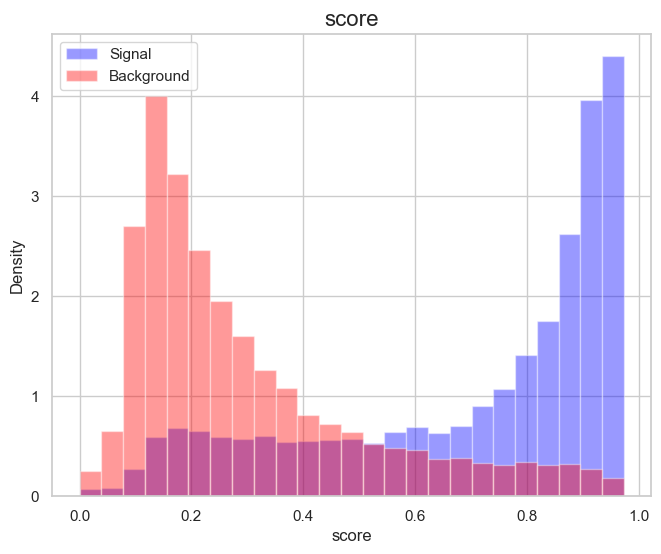

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


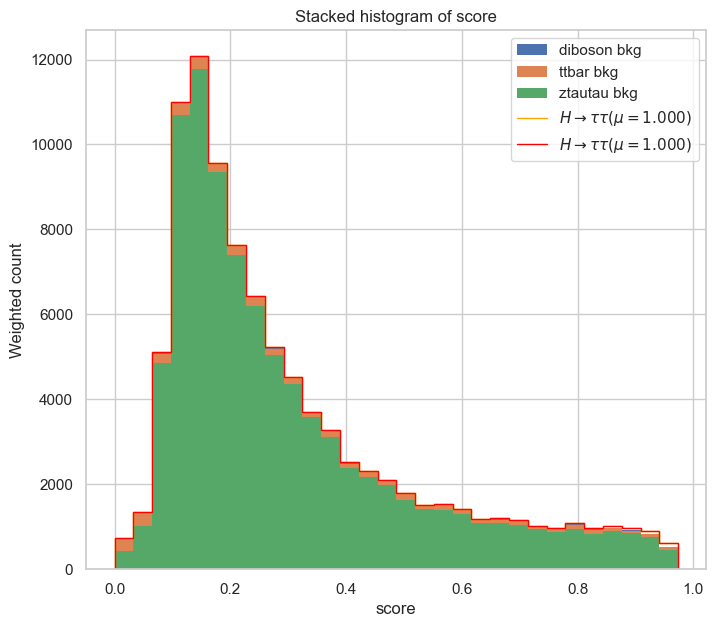

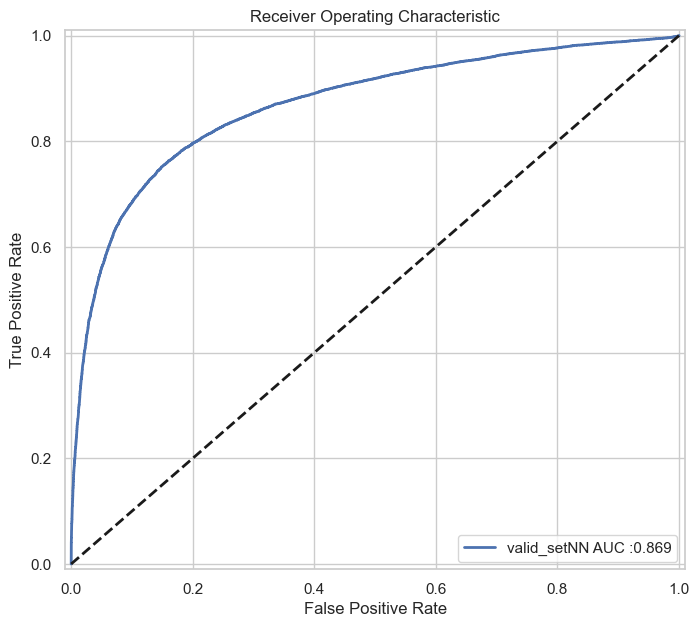

AttributeError: 'Model' object has no attribute 'significance_2'

In [12]:
optimization(data_set)